In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv('ex1data2.txt',names = ['size','bedroom','price'])
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


2.特征归一化

In [151]:
def normalize_feature(data): #定义特征归一化函数
    return (data-data.mean())/ data.std() #均值data.mean(),方差data.std()

In [152]:
data = normalize_feature(data)
data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


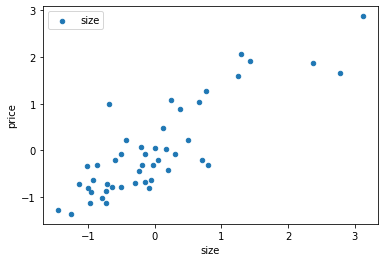

In [153]:
data.plot.scatter('size','price',label='size')
plt.show()

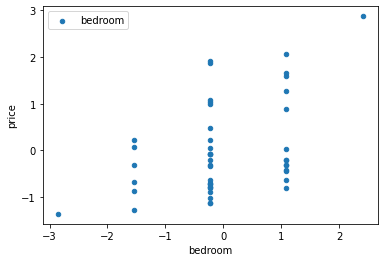

In [154]:
data.plot.scatter('bedroom','price',label='bedroom')
plt.show()

In [155]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [156]:
X = data.iloc[:,0:3]
X.head()

,ones,size,bedroom
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [157]:
y = data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [158]:
X = X.values
X.shape

(47, 3)

In [159]:
y = y.values
y.shape

(47,)

In [160]:
y = y.reshape(47,1)
y.shape

(47, 1)

In [161]:
def costFunction(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return np.sum(inner) / (2*len(X))

In [162]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [163]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [164]:
def gradientDescent(X,y,theta,alpha,iters,isprint=False):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta-y))*alpha/len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i %100 ==0:
            if isprint:
                print(cost)
            
    return costs,theta

In [165]:
candidate_alpha = [0.0003,0.003,0.03,0.0001,0.001,0.01] #数组格式
iters = 2000

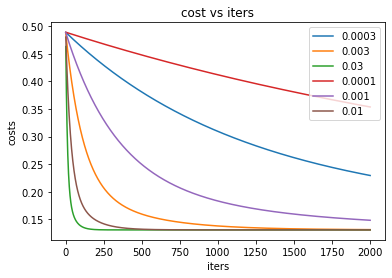

In [167]:
fig,ax = plt.subplots()

for alpha in candidate_alpha:
    costs,_ = gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()
    ax.set(xlabel='iters',
          ylabel='costs',
          title='cost vs iters')
plt.show()
